# Point Estimates and CI

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
Jan2021_df = pd.read_csv("../data/Jan2021.csv", parse_dates=['ArrivalDate', "ServiceDate", "DepartureDate"])
Feb2021_df = pd.read_csv("../data/Feb2021.csv", parse_dates=['ArrivalDate', "ServiceDate", "DepartureDate"])
Mar2021_df = pd.read_csv("../data/Mar2021.csv", parse_dates=['ArrivalDate', "ServiceDate", "DepartureDate"])

Jan2021_df.head()

,ID,ArrivalDate,ServiceDate,DepartureDate
0,6864723080599622060915876765390144529,2021-01-01 08:30:01.222868100,2021-01-01 08:39:03.333848940,2021-01-01 08:40:27.932733660
1,203357365385066636014451201901804032427,2021-01-01 08:30:01.671390000,2021-01-01 08:39:11.346811500,2021-01-01 08:40:17.102055960
2,116029838208850048074276845233524331871,2021-01-01 08:31:00.772814640,2021-01-01 08:40:04.680870000,2021-01-01 08:42:37.294710419
3,310615008049721526192877250301295600071,2021-01-01 08:33:05.254060920,2021-01-01 08:42:55.617273900,2021-01-01 09:49:12.947556960
4,89105072554443203398010006189702582842,2021-01-01 08:34:04.582200000,2021-01-01 08:44:28.205282640,2021-01-01 09:37:12.185124960


## Combine Data

In [3]:
quarter_df = pd.DataFrame()
quarter_df = quarter_df.append(Jan2021_df, ignore_index=True)
quarter_df = quarter_df.append(Feb2021_df, ignore_index=True)
quarter_df = quarter_df.append(Mar2021_df, ignore_index=True)
quarter_df.head()

,ID,ArrivalDate,ServiceDate,DepartureDate
0,6864723080599622060915876765390144529,2021-01-01 08:30:01.222868100,2021-01-01 08:39:03.333848940,2021-01-01 08:40:27.932733660
1,203357365385066636014451201901804032427,2021-01-01 08:30:01.671390000,2021-01-01 08:39:11.346811500,2021-01-01 08:40:17.102055960
2,116029838208850048074276845233524331871,2021-01-01 08:31:00.772814640,2021-01-01 08:40:04.680870000,2021-01-01 08:42:37.294710419
3,310615008049721526192877250301295600071,2021-01-01 08:33:05.254060920,2021-01-01 08:42:55.617273900,2021-01-01 09:49:12.947556960
4,89105072554443203398010006189702582842,2021-01-01 08:34:04.582200000,2021-01-01 08:44:28.205282640,2021-01-01 09:37:12.185124960


## Compute Service Times

In [4]:
quarter_df['ServiceTimes'] = quarter_df['ServiceDate'] - quarter_df['ArrivalDate']
quarter_df['ServiceTimesMin'] = quarter_df['ServiceTimes'].dt.seconds / 60
quarter_df.head()

,ID,ArrivalDate,ServiceDate,DepartureDate,ServiceTimes,ServiceTimesMin
0,6864723080599622060915876765390144529,2021-01-01 08:30:01.222868100,2021-01-01 08:39:03.333848940,2021-01-01 08:40:27.932733660,0 days 00:09:02.110980840,9.033333
1,203357365385066636014451201901804032427,2021-01-01 08:30:01.671390000,2021-01-01 08:39:11.346811500,2021-01-01 08:40:17.102055960,0 days 00:09:09.675421500,9.150000
2,116029838208850048074276845233524331871,2021-01-01 08:31:00.772814640,2021-01-01 08:40:04.680870000,2021-01-01 08:42:37.294710419,0 days 00:09:03.908055360,9.050000
3,310615008049721526192877250301295600071,2021-01-01 08:33:05.254060920,2021-01-01 08:42:55.617273900,2021-01-01 09:49:12.947556960,0 days 00:09:50.363212980,9.833333
4,89105072554443203398010006189702582842,2021-01-01 08:34:04.582200000,2021-01-01 08:44:28.205282640,2021-01-01 09:37:12.185124960,0 days 00:10:23.623082640,10.383333


## Plot Janurary Data

Text(0.5, 1.0, '1st Quarter 2021 (Jan 2021- Mar 2021)')

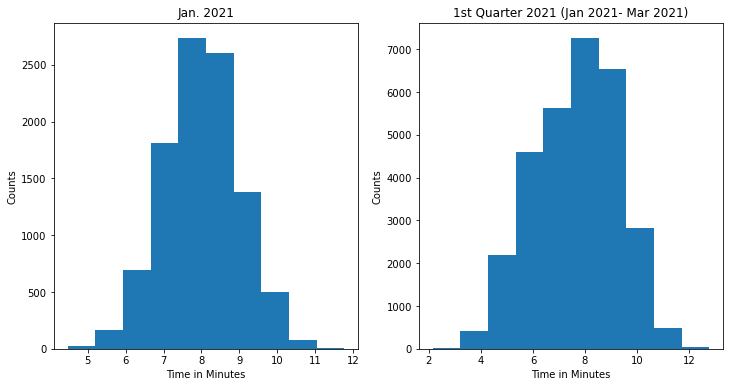

In [5]:
Jan2021_df['ServiceTimes'] = Jan2021_df['ServiceDate'] - Jan2021_df['ArrivalDate']
Jan2021_df['ServiceTimesMin'] = Jan2021_df['ServiceTimes'].dt.seconds / 60

fig, axs = plt.subplots(ncols=2, figsize=(12,6))

axs[0].hist(Jan2021_df.ServiceTimesMin)

axs[0].set_xlabel("Time in Minutes")
axs[0].set_ylabel('Counts')
axs[0].set_title("Jan. 2021")



axs[1].hist(quarter_df.ServiceTimesMin)
axs[1].set_xlabel("Time in Minutes")
axs[1].set_ylabel('Counts')
axs[1].set_title("1st Quarter 2021 (Jan 2021- Mar 2021)")

## Compute Point Estimates of Sample

- Mean
- Variance

In [6]:
from scipy import stats

## 95% CI of Point Estimate

## Does the Population Parameter fall within the CI? 

# Hypothesis Testing 

## Similar Mean 1st Month and 1st Quarter?

# 

# Do we meet our Targets for Number of Orders Late or Not Late?


Greater than 8 Minutes is Late

First Quarter we expect roughly 17000 orders to be ontime and 13000 to be late

Are we close to our target?


In [7]:
# expect this amount
expected = [17000, 13000] #[late, note late]

quarter_df['OnTime'] = 0 
quarter_df.loc[quarter_df.ServiceTimesMin > 8, "OnTime"] = 1
